# Análisis de la base de datos "earthquake"

En este notebook realizaremos una exploración de la base de datos earthquake obtenida en [kaggle](https://www.kaggle.com/usgs/earthquake-database). Esta contiene el histórico de sismos relevantes (con magnitud mayor o igual a 5.5) desde 1965 hasta 2016. 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
sismo = pd.read_csv('../data/earthquake.csv')

In [19]:
print(' Dimensión del DataFrame:')
print(sismo.shape)

print('\nNombre de las columnas de nuestro data frame: \n')
print(sismo.columns.tolist())

print('\nData frame:')
sismo.head(4)

DataFrame de tamaño:
(23412, 21)

Nombre de las columnas de nuestro data frame: 

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']

Data frame:


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic


In [20]:
print('Porcentaje de NAs:')
sismo.isna().sum()*100/sismo.shape[0]

Porcentaje de NAs:


Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64

In [21]:
sismo = (sismo.loc[:,['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
                      'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']]
         .rename(index=str, columns={'Location Source': 'Location_Source', 'Magnitude Source': 'Magnitude_Source',
                                     'Magnitude Type': 'Magnitude_Type'}))

In [28]:
sismo.sample(5)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude_Type,ID,Source,Location_Source,Magnitude_Source,Status
1483,02/02/1970,18:05:48,43.031,147.763,Earthquake,25.9,5.8,MW,ISCGEM798753,ISCGEM,ISCGEM,ISCGEM,Automatic
19149,08/31/2008,01:15:25,-61.233,-67.738,Earthquake,10.0,5.5,MWC,USP000GG1K,US,US,US,Reviewed
9207,10/23/1988,00:23:27,-20.100,-175.941,Earthquake,212.2,5.7,MW,USP0003N3H,US,US,HRV,Reviewed
15895,07/19/2002,06:43:55,-56.623,-140.690,Earthquake,10.0,6.1,MWC,USP000B8CK,US,US,HRV,Reviewed
17063,12/12/2004,16:03:38,-3.489,145.196,Earthquake,14.0,5.5,MWB,USP000DAJ4,US,US,US,Reviewed


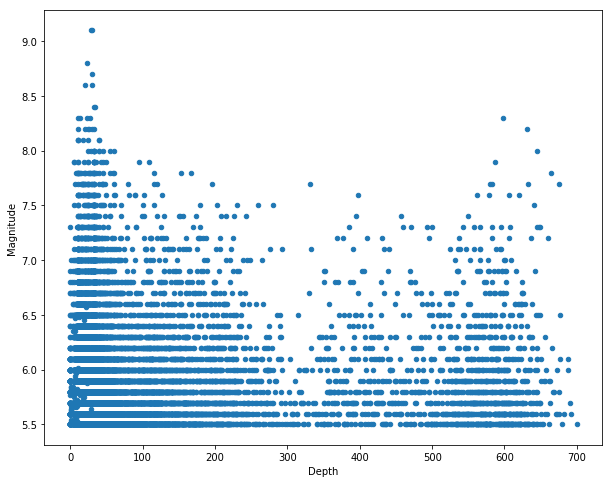

In [49]:
sismo.plot('Depth', 'Magnitude', kind='scatter', figsize=(10,8))